In [3]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Homework3 PETE 4241

####   1. The given homework data contains bulk density data, as well as sonic log data (compressional and shear velocities expressed as travel times). The formation top depths for several lithologies are given, and the appropriate correlations to use in these lithologies are provided. From the given data, calculate the following for all of the given depths:
---

In [50]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1*g_cm3 #kg/m3
mega=1e6 #Mega
Pa=1 #Pa
ms=0.000001 #us, micro seconds
psi=6894.76 


#Load and prepare the data
data1 = np.loadtxt('HW3-Data.txt', skiprows=1)
DZ_Barnett,rho_Barnett=data1[:,0]*ft,data1[:,1]*g_cm3
TP,TS=data1[:,2]*ms/ft,data1[:,3]*ms/ft

#DZ_Barnett=np.insert(DZ_Barnett,0,[0,z0-1e-6])
#rho_Barnett=np.insert(rho_Barnett,0,[rho_avg,rho_avg])

> ##### (a) Pore pressure
The pore pressure can be calculated as follows:  
$${{p}_{p}}={{\bar{\rho }}_{w}}g{z} $$

In [36]:
p_pore_Barnett=rho_w*g*DZ_Barnett
#Only preview 10 of them
showTables(X=[DZ_Barnett/1e3],Y=[p_pore_Barnett/1e6],
           XLables=['Depth_Barnett(km)'],
           YLabels=['PorePressure(MPa)'])

,Depth_Barnett(km),PorePressure(MPa)
0,1.524000,14.935200
1,1.560576,15.293645
2,1.597152,15.652090
3,1.633728,16.010534
4,1.670304,16.368979
5,1.706880,16.727424
6,1.743456,17.085869
7,1.780032,17.444314
8,1.816608,17.802758
9,1.853184,18.161203


> ##### (b) Rock porosity
The rock porosity can be calculated using density log as follows:  
$$
\phi =\frac{\rho _m-\rho _b}{\rho _m-\rho _w}
$$

In [37]:
rho_w=1*g_cm3
rho_m=2.7*g_cm3

phi_Barnett=(rho_m-rho_Barnett)/(rho_m-rho_w)
#Only preview 10 of them
showTables(X=[DZ_Barnett/1e3],Y=[phi_Barnett],
           XLables=['Depth_Barnett(km)'],
           YLabels=['Porosity_Barnett(-)'])

,Depth_Barnett(km),Porosity_Barnett(-)
0,1.524000,0.172882
1,1.560576,0.132412
2,1.597152,0.056882
3,1.633728,0.019765
4,1.670304,0.031824
5,1.706880,0.034588
6,1.743456,-0.031353
7,1.780032,0.139235
8,1.816608,-0.009294
9,1.853184,-0.010588


> ##### (c) Compressional and Shear wave velocities (Vp and Vs) in m/s, which is just the inverse of transient time

In [62]:
Vp=1/TP
Vs=1/TS

showTables([DZ_Barnett/1e3,Vp,Vs],
           XLables=['Depth_Barnett(km)','$V_p$ (m/s)','$V_s$ (m/s)'])

,Depth_Barnett(km),$V_p$ (m/s),$V_s$ (m/s)
0,1.524000,3944.073861,2654.090504
1,1.560576,3988.338559,1645.679040
2,1.597152,4540.491261,2797.801046
3,1.633728,5932.742784,3385.124554
4,1.670304,4865.496479,2707.475404
5,1.706880,4286.823363,2570.655062
6,1.743456,3919.173476,2431.799124
7,1.780032,3635.890823,2270.994968
8,1.816608,6315.135191,3288.891574
9,1.853184,6379.491859,3303.749886


> ##### (d) Shear modulus (G,MPa), Possion ratio and Youngs Modulus (E, MPa)
$$
G=\rho_bV_{s}^{2}
\\
\nu =\frac{V_{p}^{2}-2V_{s}^{2}}{2\left( V_{p}^{2}-V_{s}^{2} \right)}
\\
E=2G\left( 1+\nu \right) 
$$

In [63]:
G=rho_Barnett*Vs*Vs
nu=(Vp**2-2*Vs**2)/2/(Vp**2-Vs**2)
E=2*G*(1+nu) 

showTables([DZ_Barnett/1e3,G/mega,nu,E/mega],
           XLables=['Depth_Barnett(km)','$G$(MPa)','$v$','$E$(MPa)'])

,Depth_Barnett(km),$G$(MPa),$v$,$E$(MPa)
0,1.524000,16949.040964,0.086196,36819.975886
1,1.560576,6702.671441,0.397403,18732.671914
2,1.597152,20377.827179,0.193953,48660.326189
3,1.633728,30554.459578,0.258638,76914.023287
4,1.670304,19395.566377,0.275727,49486.894899
5,1.706880,17453.755978,0.219241,42560.678747
6,1.743456,16282.044235,0.186985,38653.091062
7,1.780032,12704.268121,0.180152,29985.923257
8,1.816608,29376.286593,0.313915,77195.874561
9,1.853184,29666.326678,0.316763,78127.030606


> ##### (e) UCS from sonic logs and also from bulk density log
|  Formation |   Depth  | Type      |     Sonic log Eqn  | Density Log Eqn|
|------------|----------|------     |  ------------------|---             |
|Marble Falls| 5000-5167| Limestone |  $0.4067E^{0.51}$  | $135.9e^{-4.8\phi}$ |
|  Duffer    | 5167-5514| Limestone | $2.4E^{0.34}$      | $135.9e^{-4.8\phi}$ |
|  Barnett   | 5514-6195| Shale     |  $0.0528E^{0.712}$ | $1.001\phi^{-1.143}$ |


In [65]:
def UCS_Sonic(Depth,E):
    #Unit of UCS and E is MPa
    UCS=np.zeros(len(E))
    for i in range(len(E)):
        if(Depth[i]<=5167*ft):
            UCS[i]=0.4067*(E[i]/mega)**0.51
        if(Depth[i]>5514*ft):
            UCS[i]=0.0528*(E[i]/mega)**0.712
        else:
            UCS[i]=2.4*(E[i]/mega)**0.34
    return UCS*mega

def UCS_Density(Depth,phi):
    #Unit of UCS and E is MPa
    UCS=np.zeros(len(phi))
    for i in range(len(phi)):
        if(Depth[i]>5514*ft):
            UCS[i]=1.001*phi[i]**(-1.143)
        else:
            UCS[i]=135.9*np.exp(-4.8*phi[i])
    return UCS*mega

UCS_S=UCS_Sonic(DZ_Barnett,E)
UCS_D=UCS_Density(DZ_Barnett,phi_Barnett)

showTables([DZ_Barnett/1e3,UCS_S/mega,UCS_D/mega],
           XLables=['Depth_Barnett(km)','UCS_Sonic(MPa)','UCS_Density(MPa)'])

c:\users\binpc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
c:\users\binpc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


,Depth_Barnett(km),UCS_Sonic(MPa),UCS_Density(MPa)
0,1.524000,85.640586,59.268859
1,1.560576,68.060502,71.976728
2,1.597152,94.156596,103.428859
3,1.633728,110.015309,123.599776
4,1.670304,94.697369,116.648645
5,1.706880,104.348932,46.820809
6,1.743456,97.433677,NaN
7,1.780032,81.320329,9.530783
8,1.816608,159.441333,NaN
9,1.853184,160.808300,NaN


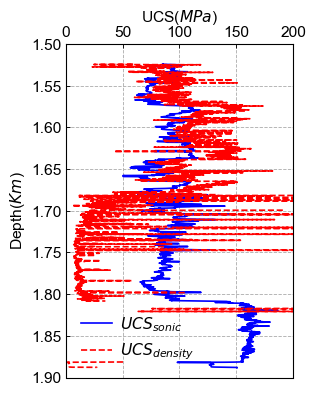

In [68]:
plotTables(Y=[DZ_Barnett/1e3,DZ_Barnett/1e3],X=[UCS_S/1e6,UCS_D/1e6],
           XLable='UCS($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$UCS_{sonic}$','$UCS_{density}$'],
           Ylim=[1.5,1.9],Xlim=[0,200],Alpha=[1,1.0,0.5],
           InvertY=True,img_fname='img.png')

In [85]:
diff_UCS1=abs(np.interp(5100*ft,DZ_Barnett,UCS_S)-np.interp(5100*ft,DZ_Barnett,UCS_D))
diff_UCS2=abs(np.interp(5300*ft,DZ_Barnett,UCS_S)-np.interp(5300*ft,DZ_Barnett,UCS_D))
diff_UCS3=abs(np.interp(5800*ft,DZ_Barnett,UCS_S)-np.interp(5800*ft,DZ_Barnett,UCS_D))

Answer={'|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5100ft':diff_UCS1/1e6,
        '|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5300ft':diff_UCS2/1e6,
        '|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5800ft':diff_UCS3/1e6,
        '$UCS_{sonic}$ (MPa) @ 5100ft':np.interp(5100*ft,DZ_Barnett,UCS_S)/1e6,
        '$UCS_{sonic}$ (MPa) @ 5300ft':np.interp(5300*ft,DZ_Barnett,UCS_S)/1e6,
        '$UCS_{sonic}$ (MPa) @ 5800ft':np.interp(5800*ft,DZ_Barnett,UCS_S)/1e6,
       }
#Show Table
pd.DataFrame.from_dict(Answer,orient='index',columns=['Value'])

,Value
|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5100ft,15.582132
|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5300ft,14.490010
|$UCS_{s}$-$UCS_{d}$| (MPa) @ 5800ft,74.798200
$UCS_{sonic}$ (MPa) @ 5100ft,71.802490
$UCS_{sonic}$ (MPa) @ 5300ft,91.063016
$UCS_{sonic}$ (MPa) @ 5800ft,87.790432
